In [1]:
%matplotlib inline
# Load the "autoreload" extension
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pylab as plt

import os
import sys
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

print(src_dir)
from classify.flow import SkeletonsFlowFull, get_datset_file

data_file = get_datset_file('CeNDR')


/Users/ajaver/Documents/GitHub/classify_strains/notebooks/../src


In [36]:
dat = {}
for tt in ['angles', 'eigenworms', 'eigenworms_full', 'xy']:     
    gen = SkeletonsFlowFull(n_batch = 1, 
                  data_file = data_file, 
                  transform_type = tt,
                  is_normalized = False,
                  set_type = 'train', 
                  sample_size_seconds = 10, 
                  sample_frequency_s=1/25.
                  )
    dat[tt] = gen._prepare_chunks(10)[0][0]

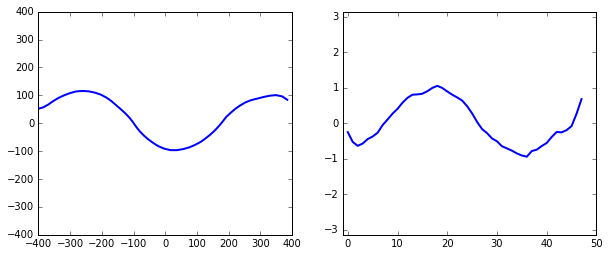

In [47]:
from matplotlib import animation
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

# First set up the figure, the axis, and the plot element we want to animate

fig = plt.figure(figsize=(10,4))
ax = plt.subplot(1,2,1)
ax.set_xlim((-400, 400))
ax.set_ylim((-400, 400))
skel, = ax.plot([], [], lw=2)

ax = plt.subplot(1,2,2)
ang, = ax.plot([], [], lw=2)
ax.set_xlim((-1, 50))
ax.set_ylim((-np.pi, np.pi))

# initialization function: plot the background of each frame
def init():
    skel.set_data([], [])
    return skel,

def animate(i):
    skels = dat['xy'][i]
    skel_x = skels[..., 0]
    skel_y = skels[..., 1]
    skel.set_data(skel_x, skel_y)
    
    xx = np.arange(48)
    angles = np.squeeze(dat['angles'])
    ang.set_data(xx, angles[i])
    
    return skel,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=250, interval=40, blit=True)

# call our new function to display the animation
HTML(anim.to_html5_video())




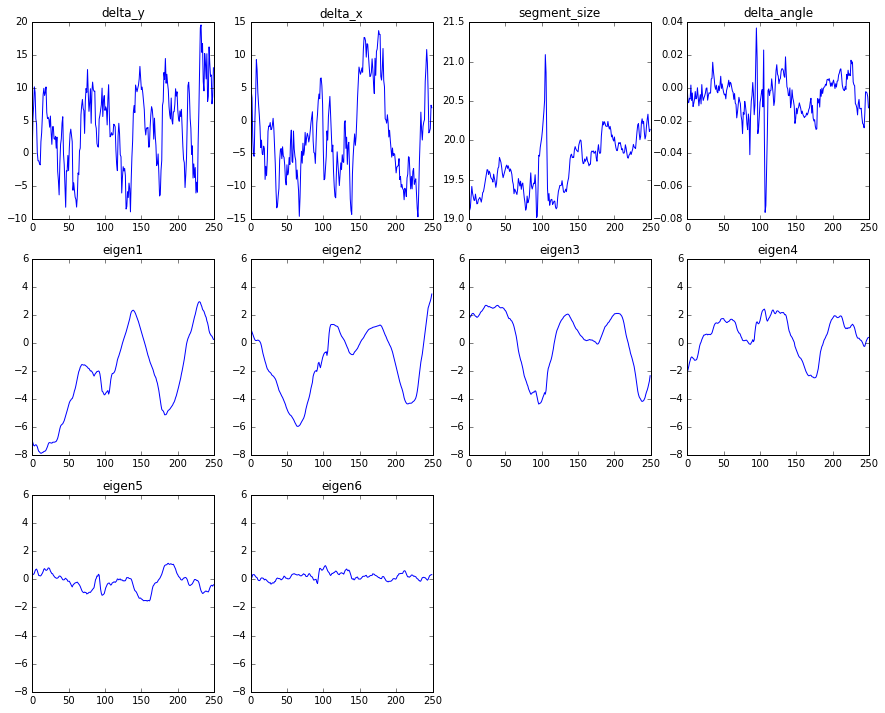

In [62]:
data_order = ['delta_y', 'delta_x', 'segment_size', 'delta_angle', 
              'eigen1', 'eigen2', 'eigen3', 'eigen4', 'eigen5', 'eigen6']
eig_dat = np.squeeze(dat['eigenworms_full'])

plt.figure(figsize=(15,12))
for ii, tt in enumerate(data_order):
    plt.subplot(3,4,ii+1)
    plt.plot(eig_dat[:, ii])
    plt.title(tt)
    if ii >= 4:
        plt.ylim((-8, 6))



angles
angles
eigenworms
eigenworms
eigenworms_full
eigenworms_full
xy
xy


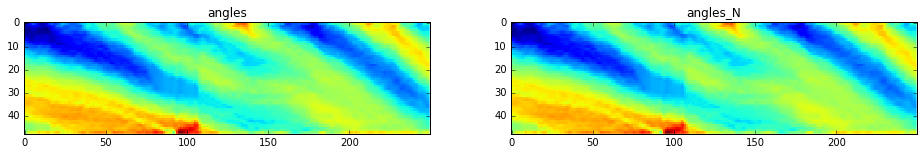

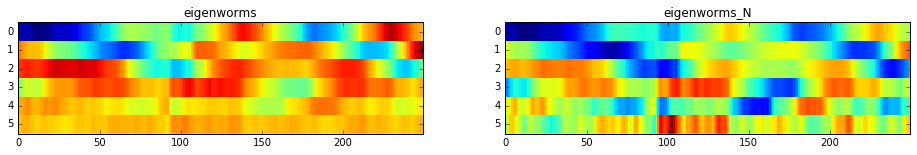

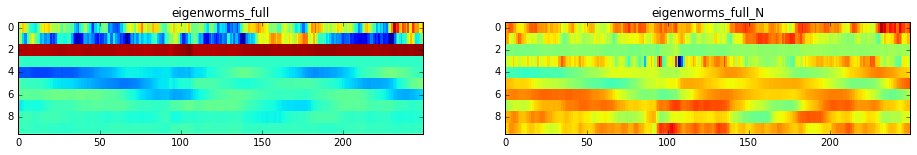

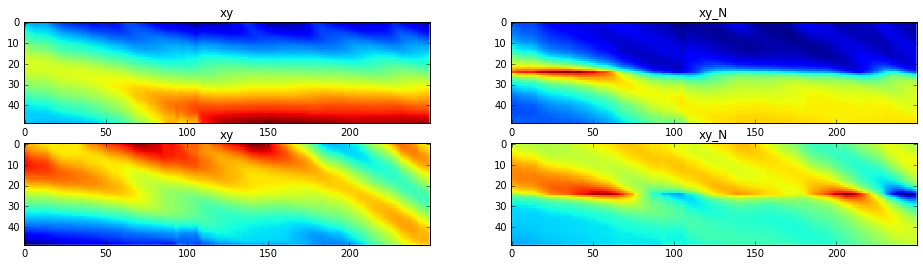

In [11]:
for tt in ['angles', 'eigenworms', 'eigenworms_full', 'xy']:
        if tt == 'xy':
            n_dim = 2
        else:
            n_dim = 1
        plt.figure(figsize=(16,2*n_dim))
        for ii_n, is_n in enumerate([False, True]):
            print(tt)
            gen = SkeletonsFlowFull(n_batch = 1, 
                          data_file = data_file, 
                          transform_type = tt,
                          is_normalized = is_n,
                          set_type = 'train', 
                          sample_size_seconds = 10, 
                          sample_frequency_s=1/25.
                          )
            X = gen._prepare_chunks(10)[0][0]
            for i_c in range(n_dim):
                plt.subplot(1*n_dim, 2, ii_n + n_dim*(i_c) + 1)
                plt.imshow(np.squeeze(X[..., i_c]).T, interpolation='none', aspect='auto')
                plt.title(tt + ('_N' if is_n else ''))
            
                
                    